In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrlogin12.jureca


In [2]:
import numpy as np

import pli
import pli.image as im

from tqdm import tqdm

In [3]:
trans_section = "data/aa/ntransmittance/Vervet1818aa_60mu_70ms_s0841_x00-21_y00-14_NTransmittance.nii.h5"
dir_section = "data/aa/direction/Vervet1818aa_60mu_70ms_s0841_x00-21_y00-14_Direction.nii.h5"
ret_section = "data/aa/retardation/Vervet1818aa_60mu_70ms_s0841_x00-21_y00-14_Retardation.nii.h5"

pli_pyramid = 1
mask_pyramid = 6
tile_size = 2 ** (mask_pyramid- pli_pyramid)

###

trans_image = pli.data.Section(trans_section).pyramid[pli_pyramid][:]
dir_image = np.deg2rad(pli.data.Section(dir_section).pyramid[pli_pyramid])
ret_image = pli.data.Section(ret_section).pyramid[pli_pyramid][:]

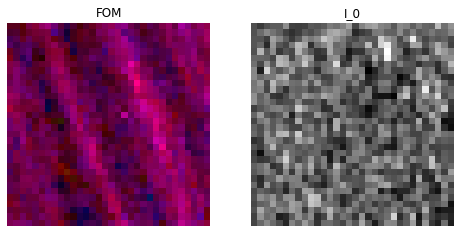

In [4]:
pos = (5300, 4500)

###

trans_tile = trans_image[pos[0]:pos[0] + tile_size, pos[1]:pos[1] + tile_size]
dir_tile = dir_image[pos[0]:pos[0] + tile_size, pos[1]:pos[1] + tile_size]
ret_tile = ret_image[pos[0]:pos[0] + tile_size, pos[1]:pos[1] + tile_size]

im.show_fom_mods(trans_tile, dir_tile, ret_tile)

In [33]:
n_bins = 42

###

from vervet1818_3d.utils.stats import pli_features

ft = pli_features(trans_tile, dir_tile, ret_tile, n_bins)

0:


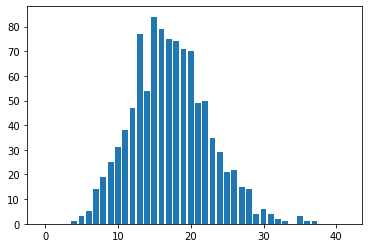

1:


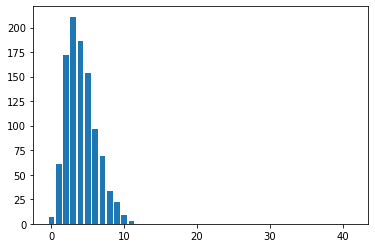

2:


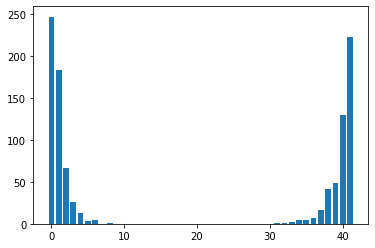

3:


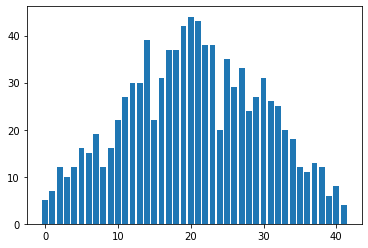

4:


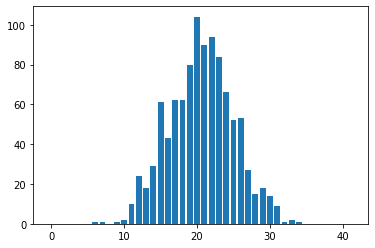

5:


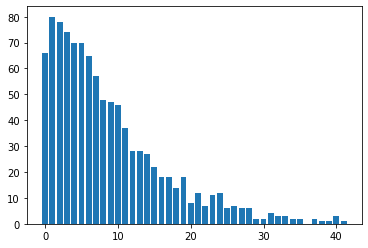

In [34]:
import matplotlib.pyplot as plt

for i, b in enumerate(np.arange(0, len(ft), n_bins)):
    print(f"{i}:")
    plt.bar(x=np.arange(n_bins), height = ft[b:b+n_bins])
    plt.show()